In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("tweets_train.csv")
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [170]:
train_data.groupby("keyword")["target"].mean()

keyword
ablaze                 0.361111
accident               0.685714
aftershock             0.000000
airplane%20accident    0.857143
ambulance              0.526316
                         ...   
wounded                0.702703
wounds                 0.303030
wreck                  0.189189
wreckage               1.000000
wrecked                0.076923
Name: target, Length: 221, dtype: float64

# Features within the tweet message

In [171]:
list_of_num = []
for i in train_data["text"]:
    num = 0
    for j in i:
        num += 1
    list_of_num += [num]
    
train_data["num_of_chars"] = list_of_num

In [172]:
train_data.head()

,id,keyword,location,text,target,num_of_chars
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


Text(0, 0.5, 'Mean odds of tweet about fake disaster')

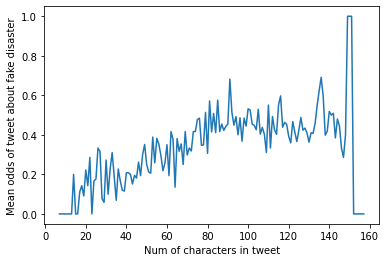

In [173]:
groupby_chars = train_data.groupby("num_of_chars")["target"].mean()
plt.plot(groupby_chars)
plt.xlabel("Num of characters in tweet")
plt.ylabel("Mean odds of tweet about fake disaster")

In [174]:
#as the num of chars in the tweet increases, so does the odds of it being about a real disaster
#more chars == better odds

In [175]:
list_of_vowels=[]
list_of_consonants=[]
for i in train_data["text"]:
    num_vowels = 0
    num_cons = 0
    for j in i:
        if j == "a" or j == "e" or j == "i" or j == "o" or j == "u":
            num_vowels+=1
        else:
            if j.isalpha() == True:
                num_cons+=1
    list_of_vowels += [num_vowels]
    list_of_consonants+=[num_cons]
train_data["num_of_vowels_in_text"]=list_of_vowels
train_data["num_of_consonants_in_text"]=list_of_consonants
train_data.head()

,id,keyword,location,text,target,num_of_chars,num_of_vowels_in_text,num_of_consonants_in_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,22,34
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,13,18
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,44,65
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,24,26
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,24,46


Text(0, 0.5, 'Probability of being a tweet about a real disaster')

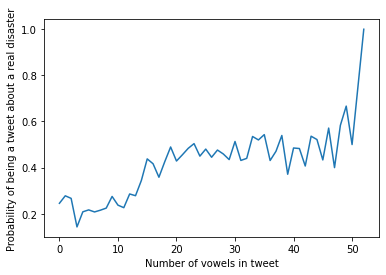

In [176]:
groupby_vow = train_data.groupby("num_of_vowels_in_text")["target"].mean()
plt.plot(groupby_vow)
plt.xlabel("Number of vowels in tweet")
plt.ylabel("Probability of being a tweet about a real disaster")

Text(0, 0.5, 'Probability of being a tweet about a real disaster')

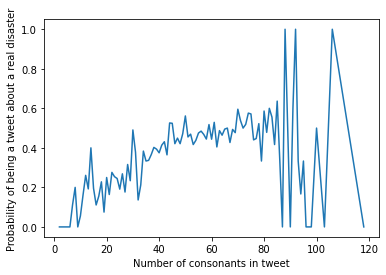

In [177]:
groupby_cons = train_data.groupby("num_of_consonants_in_text")["target"].mean()
plt.plot(groupby_cons)
plt.xlabel("Number of consonants in tweet")
plt.ylabel("Probability of being a tweet about a real disaster")

In [178]:
#num of vowels is more of a clean correlation 

In [179]:
#lets try number of special characters in tweet
list_of_special_chars=[]

for i in train_data["text"]:
    num=0
    for j in i:
        if j.isalpha()==False and j.isnumeric()==False and j!=" " and j!="'" and j!=",":
            num+=1
    list_of_special_chars+=[num]

train_data["num_special_chars"]=list_of_special_chars

In [180]:
groupby_special = train_data.groupby("num_special_chars")["target"].mean()
groupby_special.head()

num_special_chars
0    0.176842
1    0.279264
2    0.302738
3    0.322160
4    0.316547
Name: target, dtype: float64

In [181]:
list_hasspec=[]
for i in range(len(train_data["num_special_chars"])):
    if train_data["num_special_chars"][i] > 0:
        list_hasspec += [1]
    else:
        list_hasspec += [0]
train_data["hasSpecialChar"]=list_hasspec
train_data.groupby("hasSpecialChar")["target"].mean()

hasSpecialChar
0    0.176842
1    0.446484
Name: target, dtype: float64

In [182]:
#is the tweet a question? 
is_question=[]
for i in train_data['text']:
    question = 0
    if i[-1] == "?":
        question = 1
    is_question += [question]
train_data["is_question"]=is_question


In [183]:
train_data.groupby("is_question")["target"].mean()

is_question
0    0.440946
1    0.256959
Name: target, dtype: float64

# Features for the 'location' column


In [184]:
train_data["location"].value_counts()

USA                          104
New York                      71
United States                 50
London                        45
Canada                        29
                            ... 
travelling to tae's pants      1
Lytham St Anne's               1
Canterbury kent                1
Hannover, Germany              1
Huntley, IL                    1
Name: location, Length: 3341, dtype: int64

In [185]:
list_of_states = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
                  'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Minor Outlying Islands', 
                  'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
                  'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
                  'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 
                  'Utah', 'Vermont', 'Virginia', "Washington", "West Virginia", "Wisconsin", "Wyoming"]

In [186]:
list_of_abbrev = ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 
                  'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 
                  'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 
                  'SD', 'TN', 'TX', 'UM', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']

In [187]:
list_of_usa_types = ["united states","usa","united states of america","u.s","u.s.a","us","nyc","u.s.","u.s.a."]

In [188]:
#find tweets that were located in USA somewhere
tweets_in_usa = []
for i in train_data["location"]:
    #i is the printed location
    
    for j in list_of_states:
        #j is the state in the list
        if str(j).lower() in str(i).lower():
            tweets_in_usa += [i]
    for j in list_of_abbrev:
        if j in str(i):
            tweets_in_usa += [i]
    if str(i).lower() in list_of_usa_types:
        tweets_in_usa += [i]
        

num_US_tweets=[]
for i in train_data["location"]:
    if i in tweets_in_usa:
        num_US_tweets += [1]
    else:
        num_US_tweets += [0]
train_data["tweeted_in_USA"]=num_US_tweets


In [189]:
#check if location is only special characters? 
contains_only_spec_chars = []
for i in train_data["location"]:
    only_spec = 1
    #iterate through each location
    for j in str(i):
        if j.isalpha()==True or j.isnumeric()==True:
            only_spec=0
    contains_only_spec_chars+=[only_spec]

train_data["loc_contains_only_spec_chars"]=contains_only_spec_chars
train_data["loc_contains_only_spec_chars"].value_counts()

0    7566
1      47
Name: loc_contains_only_spec_chars, dtype: int64

In [190]:
#check number of words in the location
list_num_words=[]
for i in train_data["location"]:
    num_words=0
    for j in str(i):
        if j == " ":
            num_words += 1
    list_num_words+=[num_words]
train_data['loc_num_words']=list_num_words

0     4146
1     1873
2      922
3      379
4      184
5       87
6       16
7        3
8        2
10       1
Name: loc_num_words, dtype: int64

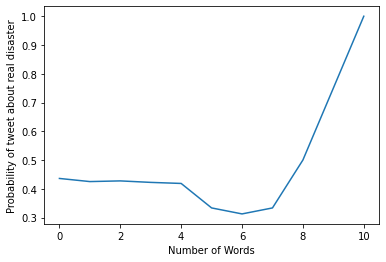

In [191]:
num_words_groupby=train_data.groupby("loc_num_words")["target"].mean()
plt.plot(num_words_groupby)
plt.xlabel("Number of Words")
plt.ylabel("Probability of tweet about real disaster")
train_data["loc_num_words"].value_counts()

In [192]:
#check if location has letters
has_letters=[]
for i in train_data["location"]:
    var = 0
    for j in str(i):
        if j.isalpha()==True:
            var=1
    has_letters+=[var]
print(len(has_letters))
train_data["loc_has_letters"]=has_letters
train_data["loc_has_letters"].value_counts()

7613


1    7518
0      95
Name: loc_has_letters, dtype: int64

In [193]:
#has numbers?
has_numbers=[]
for i in train_data["location"]:
    nums=0
    for j in str(i):
        if j.isnumeric()==True:
            nums=1
    has_numbers+=[nums]
train_data["loc_has_numbers"]=has_numbers
train_data.groupby("loc_has_numbers")["target"].mean()

loc_has_numbers
0    0.433781
1    0.300847
Name: target, dtype: float64

In [194]:
count=0
for i in train_data:
    count += 1
print(count)

16


In [195]:
train_data.head()

,id,keyword,location,text,target,num_of_chars,num_of_vowels_in_text,num_of_consonants_in_text,num_special_chars,hasSpecialChar,is_question,tweeted_in_USA,loc_contains_only_spec_chars,loc_num_words,loc_has_letters,loc_has_numbers
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,22,34,1,1,0,0,0,0,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,13,18,1,1,0,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,44,65,1,1,0,0,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,24,26,1,1,0,0,0,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,24,46,2,1,0,0,0,0,1,0


In [196]:
train_data.groupby("loc_contains_only_spec_chars")["target"].mean()

loc_contains_only_spec_chars
0    0.429157
1    0.510638
Name: target, dtype: float64

# Keyword features

In [197]:
fires_list=[]
fire_keywords=["fire","blaze","flame"]
for i in train_data["keyword"]:
    fires=0
    for j in fire_keywords:
        if j in str(i):
            fires=1
    fires_list+=[fires]
train_data["has_fire"]=fires_list

train_data["has_fire"].value_counts()

0    7217
1     396
Name: has_fire, dtype: int64

In [198]:
train_data.groupby("has_fire")["target"].mean()

has_fire
0    0.423445
1    0.542929
Name: target, dtype: float64

In [199]:
train_data["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [200]:
train_data

,id,keyword,location,text,target,num_of_chars,num_of_vowels_in_text,num_of_consonants_in_text,num_special_chars,hasSpecialChar,is_question,tweeted_in_USA,loc_contains_only_spec_chars,loc_num_words,loc_has_letters,loc_has_numbers,has_fire
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,22,34,1,1,0,0,0,0,1,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,13,18,1,1,0,0,0,0,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,44,65,1,1,0,0,0,0,1,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,24,26,1,1,0,0,0,0,1,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,24,46,2,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,20,47,5,1,0,0,0,0,1,0,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,39,62,5,1,0,0,0,0,1,0,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,10,28,11,1,0,0,0,0,1,0,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,48,66,5,1,0,0,0,0,1,0,0


In [201]:
y_train = train_data["target"]

In [202]:
train_data

,id,keyword,location,text,target,num_of_chars,num_of_vowels_in_text,num_of_consonants_in_text,num_special_chars,hasSpecialChar,is_question,tweeted_in_USA,loc_contains_only_spec_chars,loc_num_words,loc_has_letters,loc_has_numbers,has_fire
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,22,34,1,1,0,0,0,0,1,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,13,18,1,1,0,0,0,0,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,44,65,1,1,0,0,0,0,1,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,24,26,1,1,0,0,0,0,1,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,24,46,2,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,20,47,5,1,0,0,0,0,1,0,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,39,62,5,1,0,0,0,0,1,0,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,10,28,11,1,0,0,0,0,1,0,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,48,66,5,1,0,0,0,0,1,0,0


In [203]:
train_data = train_data.drop(["location","text","target"],axis=1)

In [204]:
train_data = pd.get_dummies(train_data)

In [205]:
train_data

,id,num_of_chars,num_of_vowels_in_text,num_of_consonants_in_text,num_special_chars,hasSpecialChar,is_question,tweeted_in_USA,loc_contains_only_spec_chars,loc_num_words,...,keyword_weapons,keyword_whirlwind,keyword_wild%20fires,keyword_wildfire,keyword_windstorm,keyword_wounded,keyword_wounds,keyword_wreck,keyword_wreckage,keyword_wrecked
0,1,69,22,34,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,38,13,18,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,133,44,65,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,65,24,26,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,88,24,46,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,83,20,47,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,10870,125,39,62,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,10871,65,10,28,11,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,10872,137,48,66,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# start test set

In [206]:
test_data = pd.read_csv("tweets_test.csv")

In [207]:
test_list_of_num = []
for i in test_data["text"]:
    num2 = 0
    for j in i:
        num2 += 1
    test_list_of_num += [num2]
    
test_data["num_of_chars"] = test_list_of_num

In [208]:
test_list_of_vowels=[]
test_list_of_consonants=[]
for i in test_data["text"]:
    num_vowels2 = 0
    num_cons2 = 0
    for j in i:
        if j == "a" or j == "e" or j == "i" or j == "o" or j == "u":
            num_vowels2+=1
        else:
            if j.isalpha() == True:
                num_cons2+=1
    test_list_of_vowels+=[num_vowels2]
    test_list_of_consonants+=[num_cons2]
test_data["num_of_vowels_in_text"]=test_list_of_vowels
test_data["num_of_consonants_in_text"]=test_list_of_consonants

In [209]:
test_list_of_special_chars=[]
for i in test_data["text"]:
    num2=0
    for j in i:
        if j.isalpha()==False and j.isnumeric()==False and j!=" " and j!="'" and j!=",":
            num2+=1
    test_list_of_special_chars+=[num]
test_data["num_special_chars"]=test_list_of_special_chars

In [210]:
test_list_hasspec=[]
for i in range(len(test_data["num_special_chars"])):
    if test_data["num_special_chars"][i] > 0:
        test_list_hasspec += [1]
    else:
        test_list_hasspec += [0]
test_data["hasSpecialChar"]=test_list_hasspec

In [211]:
test_is_question=[]
for i in test_data['text']:
    question2 = 0
    if i[-1] == "?":
        question2 = 1
    test_is_question += [question2]
test_data["is_question"]=test_is_question

In [212]:
test_tweets_in_usa = []
for i in test_data["location"]:
    isinUS = 0
    for j in list_of_states:
        #j is the state in the list
        if str(j).lower() in str(i).lower():
            isinUS = 1
    for j in list_of_abbrev:
        if j in str(i):
            isinUS = 1
    if str(i).lower() in list_of_usa_types:
        isinUS = 1
    test_tweets_in_usa +=[isinUS]
test_data["tweeted_in_USA"]=test_tweets_in_usa

In [213]:
test_contains_only_spec_chars = []
for i in test_data["location"]:
    test_only_spec = 1
    #iterate through each location
    for j in str(i):
        if j.isalpha()==True or j.isnumeric()==True:
            test_only_spec=0
    test_contains_only_spec_chars+=[only_spec]
test_data["loc_contains_only_spec_chars"]=test_contains_only_spec_chars

In [214]:
test_list_num_words=[]
for i in test_data["location"]:
    test_num_words=0
    for j in str(i):
        if j == " ":
            test_num_words += 1
    test_list_num_words+=[test_num_words]
test_data['loc_num_words']=test_list_num_words

In [215]:
test_has_letters=[]
for i in test_data["location"]:
    var2 = 0
    for j in str(i):
        if j.isalpha()==True:
            var2=1
    test_has_letters+=[var2]
test_data["loc_has_letters"]=test_has_letters

In [216]:
test_has_numbers=[]
for i in test_data["location"]:
    nums2=0
    for j in str(i):
        if j.isnumeric()==True:
            nums2=1
    test_has_numbers+=[nums2]
test_data["loc_has_numbers"]=test_has_numbers

In [217]:
test_fires_list=[]
for i in test_data["keyword"]:
    fires2=0
    for j in fire_keywords:
        if j in str(i):
            fires2=1
    test_fires_list+=[fires2]
test_data["has_fire"]=test_fires_list

In [218]:
test_data.head()

,id,keyword,location,text,num_of_chars,num_of_vowels_in_text,num_of_consonants_in_text,num_special_chars,hasSpecialChar,is_question,tweeted_in_USA,loc_contains_only_spec_chars,loc_num_words,loc_has_letters,loc_has_numbers,has_fire
0,0,NaN,NaN,Just happened a terrible car crash,34,10,19,7,1,0,0,0,0,1,0,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64,24,29,7,1,0,0,0,0,1,0,0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96,30,46,7,1,0,0,0,0,1,0,0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40,11,23,7,1,0,0,0,0,1,0,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45,14,22,7,1,0,0,0,0,1,0,0


In [219]:
test_data = test_data.drop(["location","text"],axis=1)
test_data.shape

(3263, 14)

In [220]:
test_data = pd.get_dummies(test_data)
test_data.shape

(3263, 234)

In [221]:
# dtypes=pd.DataFrame(train_data.dtypes,columns=["dtypes_of_nan"])
# for i in dtypes["dtypes_of_nan"]:
#     print(i)

machine learning

In [222]:
features_list = []
for i in train_data.columns:
    features_list += [i]
x_train = train_data[features_list]

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [225]:
model.score(x_train,y_train)

1.0

In [226]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(x_train,y_train)
print("accuracy on training set: %f" % forest.score(x_train,y_train))

accuracy on training set: 1.000000


In [227]:
prediction = model.predict(test_data[features_list])

In [228]:
final_df = pd.DataFrame(index = None)
final_df["id"] = test_data["id"]
final_df["target"]=prediction

In [229]:
final_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,0
3261,10874,1


In [231]:
final_df.to_csv("pred_submission", index=None)